




<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

### 
<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Hwk Review](#0)<br>
2.  [Matplotlib+Pandas Exercises](#2)<br>
3.  Exercises in-class
4.  [Review](#12)<br>     
</div>
<hr>

<h2> Hwk Review </h2>


<h2> Working with Pandas and Matplotlib </h2>

## MovieLens 1M Dataset

working with 3 dat files - generic data types, in this case holding plain text, read in using pd.read_table(), assign labels with a look 


In [11]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::',
                      header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

print(users)

      user_id gender  age  occupation    zip
0           1      F    1          10  48067
1           2      M   56          16  70072
2           3      M   25          15  55117
3           4      M   45           7  02460
4           5      M   25          20  55455
...       ...    ...  ...         ...    ...
6035     6036      F   25          15  32603
6036     6037      F   45           1  76006
6037     6038      F   56           1  14706
6038     6039      F   45           0  01060
6039     6040      M   25           6  11106

[6040 rows x 5 columns]


<h2>Pandas .merge() method</h2>

In [14]:
# -------INNER JOIN--------

# Inner join keeps only keys that exist in both columns

# In this example both ratings and reviews have a 'movie_id' in common
import pandas as pd

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

# Performing an *inner join* on 'ratings' and passing in the 'movies' data frame will get a combined dataframe of both

# Specifying the 'movie_id' column as the 'on' argument ensures that the new combinied dataframe
#   will only contain 'movie_id's existed in both original dataframes

#EXAMPLE:   
ratings.merge(movies, on='movie_id')

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [ ]:
# -------LEFT JOIN--------

# Left Join keeps all values from the 'left', but only values that are common between the two from the right
# The join type is passed as a string arguement when calling a merge. EXAMPLE:    df1.merge(df2, on='column_name', how='join_type')

# In this example both ratings and reviews have a 'movie_id' in common
import pandas as pd

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

# Specifying the 'movie_id' column for the 'on' argument ensures that the new combinied dataframe
#   will only contain 'movie_id's existed in both original dataframes

#EXAMPLE:   
ratings.merge(movies, on='movie_id', how='left')

In [16]:
# -------RIGHT JOIN--------

# Similar to left join, except now keeping all values from the right and only the common ones from the left

# In this example both ratings and reviews have a 'movie_id' in common
import pandas as pd

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

# Specifying the 'movie_id' column for the 'on' argument ensures that the new combinied dataframe
#   will only contain 'movie_id's existed in both original dataframes

#EXAMPLE:   
ratings.merge(movies, on='movie_id', how='right')

,user_id,movie_id,rating,timestamp,title,genres
0,1.0,1,5.0,9.788243e+08,Toy Story (1995),Animation|Children's|Comedy
1,6.0,1,4.0,9.782370e+08,Toy Story (1995),Animation|Children's|Comedy
2,8.0,1,4.0,9.782335e+08,Toy Story (1995),Animation|Children's|Comedy
3,9.0,1,5.0,9.782260e+08,Toy Story (1995),Animation|Children's|Comedy
4,10.0,1,5.0,9.782265e+08,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...
1000381,5812.0,3952,4.0,9.920721e+08,"Contender, The (2000)",Drama|Thriller
1000382,5831.0,3952,3.0,9.862231e+08,"Contender, The (2000)",Drama|Thriller
1000383,5837.0,3952,4.0,1.011903e+09,"Contender, The (2000)",Drama|Thriller
1000384,5927.0,3952,1.0,9.798525e+08,"Contender, The (2000)",Drama|Thriller


In [18]:
# -------OUTER JOIN--------

# Outer Join will keep non shared columns from both dataframes.
# Missing values will be populated as NaN

# In this example both ratings and reviews have a 'movie_id' in common
import pandas as pd

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

# Hazily gazing at snowflakes stacking
# Is the fluff be enough to thwart sweet release from class?
#    -Thoughts from the 4th floor
#    snow.rgb(255,0,0)


#EXAMPLE:   
ratings.merge(movies, on='movie_id', how='right')

,user_id,movie_id,rating,timestamp,title,genres
0,1.0,1,5.0,9.788243e+08,Toy Story (1995),Animation|Children's|Comedy
1,6.0,1,4.0,9.782370e+08,Toy Story (1995),Animation|Children's|Comedy
2,8.0,1,4.0,9.782335e+08,Toy Story (1995),Animation|Children's|Comedy
3,9.0,1,5.0,9.782260e+08,Toy Story (1995),Animation|Children's|Comedy
4,10.0,1,5.0,9.782265e+08,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...
1000381,5812.0,3952,4.0,9.920721e+08,"Contender, The (2000)",Drama|Thriller
1000382,5831.0,3952,3.0,9.862231e+08,"Contender, The (2000)",Drama|Thriller
1000383,5837.0,3952,4.0,1.011903e+09,"Contender, The (2000)",Drama|Thriller
1000384,5927.0,3952,1.0,9.798525e+08,"Contender, The (2000)",Drama|Thriller


Now for filtering, I want to group by movie title and find only the 'active' titles. Active means that there are over 250 ratings at least in my dataset for the movie. How should I do this?

Introducing a nifty pandas shortcut to frame creation: the pivot table! Exact same creation mechanism as for dataframes (data, index, columns) but now we can specify an aggfunc parameter at the end. Defaults to 'mean'. Avoids the need for a lambda or iterable and recreates a new frame in place! 

In [ ]:
mean_ratings = data.pivot_table('rating', index='title', #data, index, columns, aggfunc
                                columns='gender', aggfunc='mean') #aggfunc = 'mean' default


Now I want to filter mean ratings on only active ratings:


I want to see the top female ratings to get an insight into the movies that females prefer so:

I'm also interested in the movie ratings for which gender opinions differ the most so I'll examine this by creating a difference column subtracting the rating results between male and female reviewers and find the top results

<h2> Exercise: </h2>
1) Add on a rating stdev by title column. <br> 
2) Filter the rating standard deviations by active titles only. <br> 
3) Sort the series by value in descending order.<br> 
4) Plot the first 10 stdevs in your series in matplotlib 

<h2> Back to Y-Finance Exercise </h2>

Use the previously used yahoo finance pickle files to create two new dataframes. <br>
1) Plot the price of Apple in the month of January and compare to a graph of the volume of Apple in January. <br> 
2) Plot the price of IBM in April and the price of Miscrosoft in April on one graph and compare. <br> 
3) Plot all prices over the year of 2010 in one graph. This may require some experimentation on your end to see what fits, what doesn't. <br>

Solution:

<h3> Problem </h3>

Using Yahoo Finance; download Bitcoin, Ethereum USD, and Tesla stocks for all of 2021. 

1) Clean the data

2) Organize the stocks by date then symbol.

3) Round all of the digits to 2 after the decimal

4) Find the highest stock price for the year for each stock.

5) Then find the lowest price 

6) Calc stock growth for the year. Did it go up or down? Plot the results for each stock in matplotlib using a graph and style of your choice. 

[*********************100%***********************]  3 of 3 completed
Sorted by date/symbol:
               Adj Close                                   Close               \
                 BTC-USD      ETH-USD         TSLA       BTC-USD      ETH-USD   
Date                                                                            
2021-01-04  31971.914062  1040.233032   729.770020  31971.914062  1040.233032   
2021-01-05  33992.429688  1100.006104   735.109985  33992.429688  1100.006104   
2021-01-06  36824.363281  1207.112183   755.979980  36824.363281  1207.112183   
2021-01-07  39371.042969  1225.678101   816.039978  39371.042969  1225.678101   
2021-01-08  40797.609375  1224.197144   880.020020  40797.609375  1224.197144   
...                  ...          ...          ...           ...          ...   
2021-12-23  50784.539062  4108.015625  1067.000000  50784.539062  4108.015625   
2021-12-27  50640.417969  4037.547607  1093.939941  50640.417969  4037.547607   
2021-12-28  47588

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

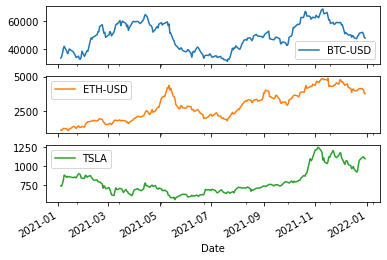

In [26]:
import pandas as pd
import yfinance as yf


data = yf.download(['BTC-USD','ETH-USD','TSLA'], start='2021-01-01', end='2021-12-31')

#1. Clean the data
data.dropna(inplace=True)

#2. Order by rows by data, columns by symbol.
print(f"Sorted by date/symbol:\n{data.sort_index(axis=0)}\n")

#3. Round all digits to 2 decimal places
print(f"Rouded to 2nd decimal:\n{data.round(2)}\n")

#4. Get the highest stock price of the year for each company
print(f"Yearly highs:\n{data['High'].max()}\n")

#5. Get the lowest stock price of the year for each company
print(f"Yearly lows:\n{data['High'].min()}\n")

#6. Find and Graph the the stocks yearly growth
print(f"Amount grown:\n{data['High'].iloc[-1]-data['High'].iloc[0]}")

data['High'].plot(subplots=True)